In [1]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['IrisDataset']
frame = ds.to_dataframe()

In [2]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np


# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [3]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
num_cols = [0,1,2,3,4]

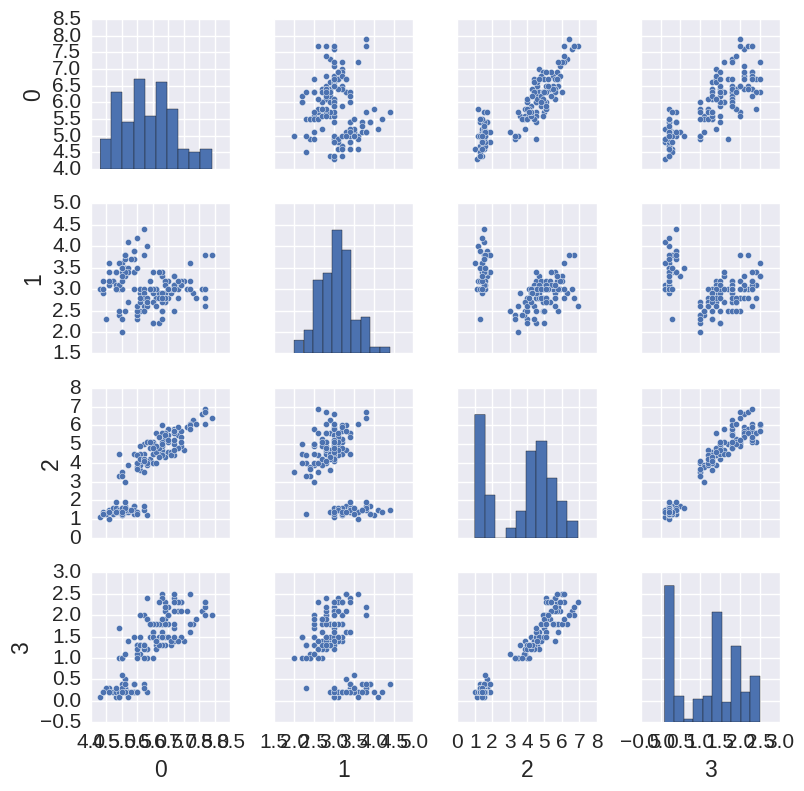

In [7]:
sns.pairplot(frame[num_cols],size=2)

In [8]:
# Check the available styles
plt.style.available

['seaborn-colorblind',
 'bmh',
 'seaborn-pastel',
 'seaborn-dark-palette',
 'seaborn-paper',
 'grayscale',
 'seaborn-deep',
 'seaborn-ticks',
 'ggplot',
 'seaborn-white',
 'fivethirtyeight',
 'seaborn-muted',
 'seaborn-bright',
 'classic',
 'seaborn-darkgrid',
 'seaborn-dark',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-talk',
 'dark_background']

In [9]:
plt.style.use('ggplot')

In [10]:
X = frame.drop(4 , 1).values # drop target variable
y1 = frame[4].values
y = frame[4]

In [11]:
# Scaling of X
scaler = MinMaxScaler()
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X_scaled = scaler.fit_transform(X)

print('X_scaled type is', type(X_scaled))
X_scaled

X_scaled type is <class 'numpy.ndarray'>


array([[ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.41666667,  0.06779661,  0.04166667],
       [ 0.11111111,  0.5       ,  0.05084746,  0.04166667],
       [ 0.08333333,  0.45833333,  0.08474576,  0.04166667],
       [ 0.19444444,  0.66666667,  0.06779661,  0.04166667],
       [ 0.30555556,  0.79166667,  0.11864407,  0.125     ],
       [ 0.08333333,  0.58333333,  0.06779661,  0.08333333],
       [ 0.19444444,  0.58333333,  0.08474576,  0.04166667],
       [ 0.02777778,  0.375     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.45833333,  0.08474576,  0.        ],
       [ 0.30555556,  0.70833333,  0.08474576,  0.04166667],
       [ 0.13888889,  0.58333333,  0.10169492,  0.04166667],
       [ 0.13888889,  0.41666667,  0.06779661,  0.        ],
       [ 0.        ,  0.41666667,  0.01694915,  0.        ],
       [ 0.41666667,  0.83333333,  0.03389831,  0.04166667],
       [ 0.38888889,  1.        ,  0.08474576,  0.125     ],
       [ 0.30555556,  0.

In [13]:
# transform back to df for easier exploration/plotting (output of scaler)
X_scaled_df = pd.DataFrame(X_scaled, columns=['s_SepalLength','s_SepalWidth',
                                              's_PetalLength','s_PetalWidth'])

X_scaled_df.head()

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [14]:
df_iris_scaled = pd.concat([X_scaled_df,y],axis=1)
df_iris_scaled.head()

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth,4
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


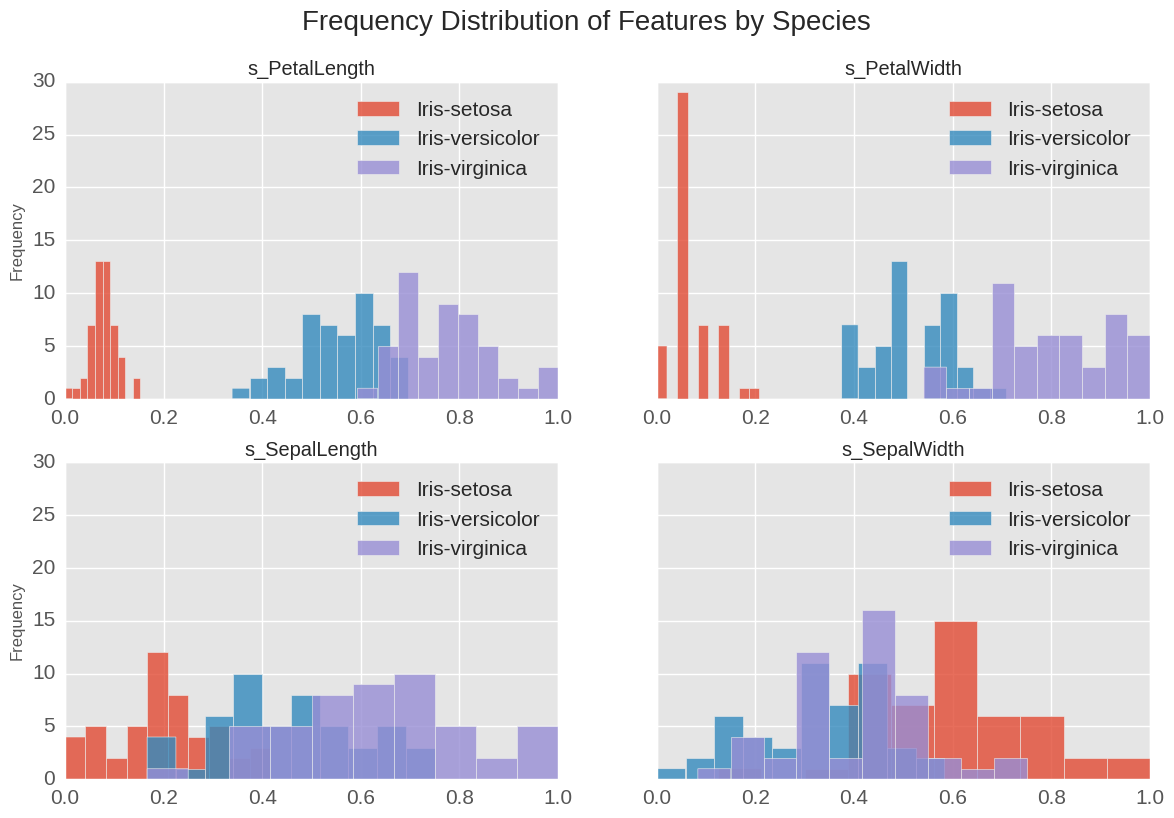

In [15]:
# Notice x-axis on subplots are all the same for all features (0 to 1) 
# after scaling.
fig = plt.figure(figsize=(14,9))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)

ax1 = fig.add_subplot(221)
df_iris_scaled.groupby(4).s_PetalLength.plot(kind='hist',
                                                   alpha=0.8,
                                                   legend=True,
                                                   title='s_PetalLength')

ax2 = fig.add_subplot(222,sharey=ax1)
df_iris_scaled.groupby(4).s_PetalWidth.plot(kind='hist',
                                                  alpha=0.8,
                                                  legend=True,
                                                  title='s_PetalWidth')

ax3 = fig.add_subplot(223,sharey=ax1)
df_iris_scaled.groupby(4).s_SepalLength.plot(kind='hist',
                                                   alpha=0.8,
                                                   legend=True,
                                                   title='s_SepalLength')

ax4 = fig.add_subplot(224,sharey=ax1)
df_iris_scaled.groupby(4).s_SepalWidth.plot(kind='hist',
                                                  alpha=0.8,
                                                  legend=True,
                                                  title='s_SepalWidth');